### Import Libarary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('white')
plt.rc('axes',unicode_minus=False)

In [2]:
titanic = pd.read_csv('./data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 결측치 처리
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Cabin.fillna('UNK', inplace=True)
titanic.Embarked.fillna('UNK', inplace=True)
titanic.Cabin = titanic.Cabin.str[:1]
titanic = titanic.drop(columns=['PassengerId','Name','Ticket'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [5]:
# 범주형 데이터 처리
from sklearn.preprocessing import LabelEncoder

for col in ['Sex','Cabin','Embarked'] :
    le=LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [6]:
y = titanic.Survived
X = titanic.drop(columns='Survived')
np.random.seed(2022)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter=200) # Default 100
clf_log.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
clf_log.coef_

array([[-8.49098735e-01, -2.49749509e+00, -4.62895425e-02,
        -3.60954891e-01,  1.21980431e-02,  1.09040243e-03,
        -1.20034185e-01, -7.89227106e-02]])

In [9]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [10]:
pd.DataFrame({'변수명':X.columns, '계수값':clf_log.coef_[0]})

,변수명,계수값
0,Pclass,-0.849099
1,Sex,-2.497495
2,Age,-0.046290
3,SibSp,-0.360955
4,Parch,0.012198
5,Fare,0.001090
6,Cabin,-0.120034
7,Embarked,-0.078923


In [11]:
pred_log = clf_log.predict(X_test)
pred_log

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.7910447761194029

In [13]:
from sklearn.metrics import roc_auc_score
pred_log2 = clf_log.predict_proba(X_test)[:,1]
pred_log2 # 첫 번째 열값만 필요해서 추출 (1일 때의 확률값)
roc_auc_score(y_test, pred_log2) # roc_auc는 확률값을 받음

0.8633630952380952

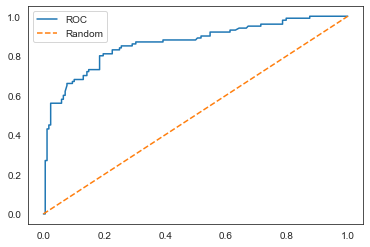

In [14]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y_test, pred_log2)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1],'--',label='Random')
plt.legend()
plt.show();

In [15]:
# Cross Validation
from sklearn.model_selection import cross_val_score

clf_log = LogisticRegression(max_iter=200)
scores = cross_val_score(clf_log, X, y, scoring='roc_auc', cv=5)
print(scores)
print('Mean: ',np.mean(scores))

[0.85006588 0.83161765 0.8546123  0.84485294 0.8744183 ]
Mean:  0.8511134118585607


### Decision Tree

In [16]:
from dtreeviz.trees import *

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=2022)
dt.fit(X_train, y_train).score(X_test, y_test)

0.8283582089552238

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred_dt01 = dt.predict(X_test)
pred_dt02 = dt.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt02))

0.8283582089552238
0.8611011904761904


In [19]:
# checking feature importance
dt.feature_importances_

array([0.17265235, 0.56969958, 0.08376116, 0.06146241, 0.        ,
       0.04037133, 0.07205316, 0.        ])

In [20]:
fe = pd.DataFrame({'열이름':X.columns, '변수중요도':dt.feature_importances_}).sort_values('변수중요도',ascending=False)
fe

,열이름,변수중요도
1,Sex,0.569700
0,Pclass,0.172652
2,Age,0.083761
6,Cabin,0.072053
3,SibSp,0.061462
5,Fare,0.040371
4,Parch,0.000000
7,Embarked,0.000000


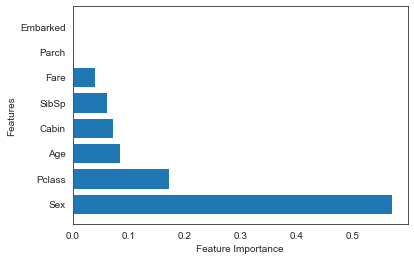

In [21]:
plt.barh(fe.열이름, fe.변수중요도, align='center');
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [22]:
results_tr = []
results_te = []

for m in range(1,20) :
    dt = DecisionTreeClassifier(max_depth=m)
    dt.fit(X_train, y_train)
    pred_tr = dt.predict_proba(X_train)[:,1]
    pred_te = dt.predict_proba(X_test)[:,1]
    results_tr.append(roc_auc_score(y_train, pred_tr))
    results_te.append(roc_auc_score(y_test, pred_te))

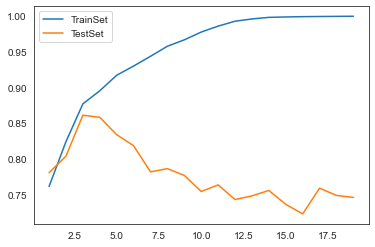

In [23]:
# Underfitting n Overfitting
plt.plot(range(1,20),results_tr, label='TrainSet')
plt.plot(range(1,20),results_te, label='TestSet')
plt.legend();

In [24]:
# Print text represent
from sklearn import tree
text_representation = tree.export_text(dt, feature_names=X.columns.tolist())
print(text_representation)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Fare <= 28.23
|   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  37.00
|   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  39.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |--- Fare <= 22.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  22.00
|   |   |   |   |   |   |--- Age <= 43.00
|   |   |   |   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |   |   |   |--- Age <= 25.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  25.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  27.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  43.00
|   |   |  

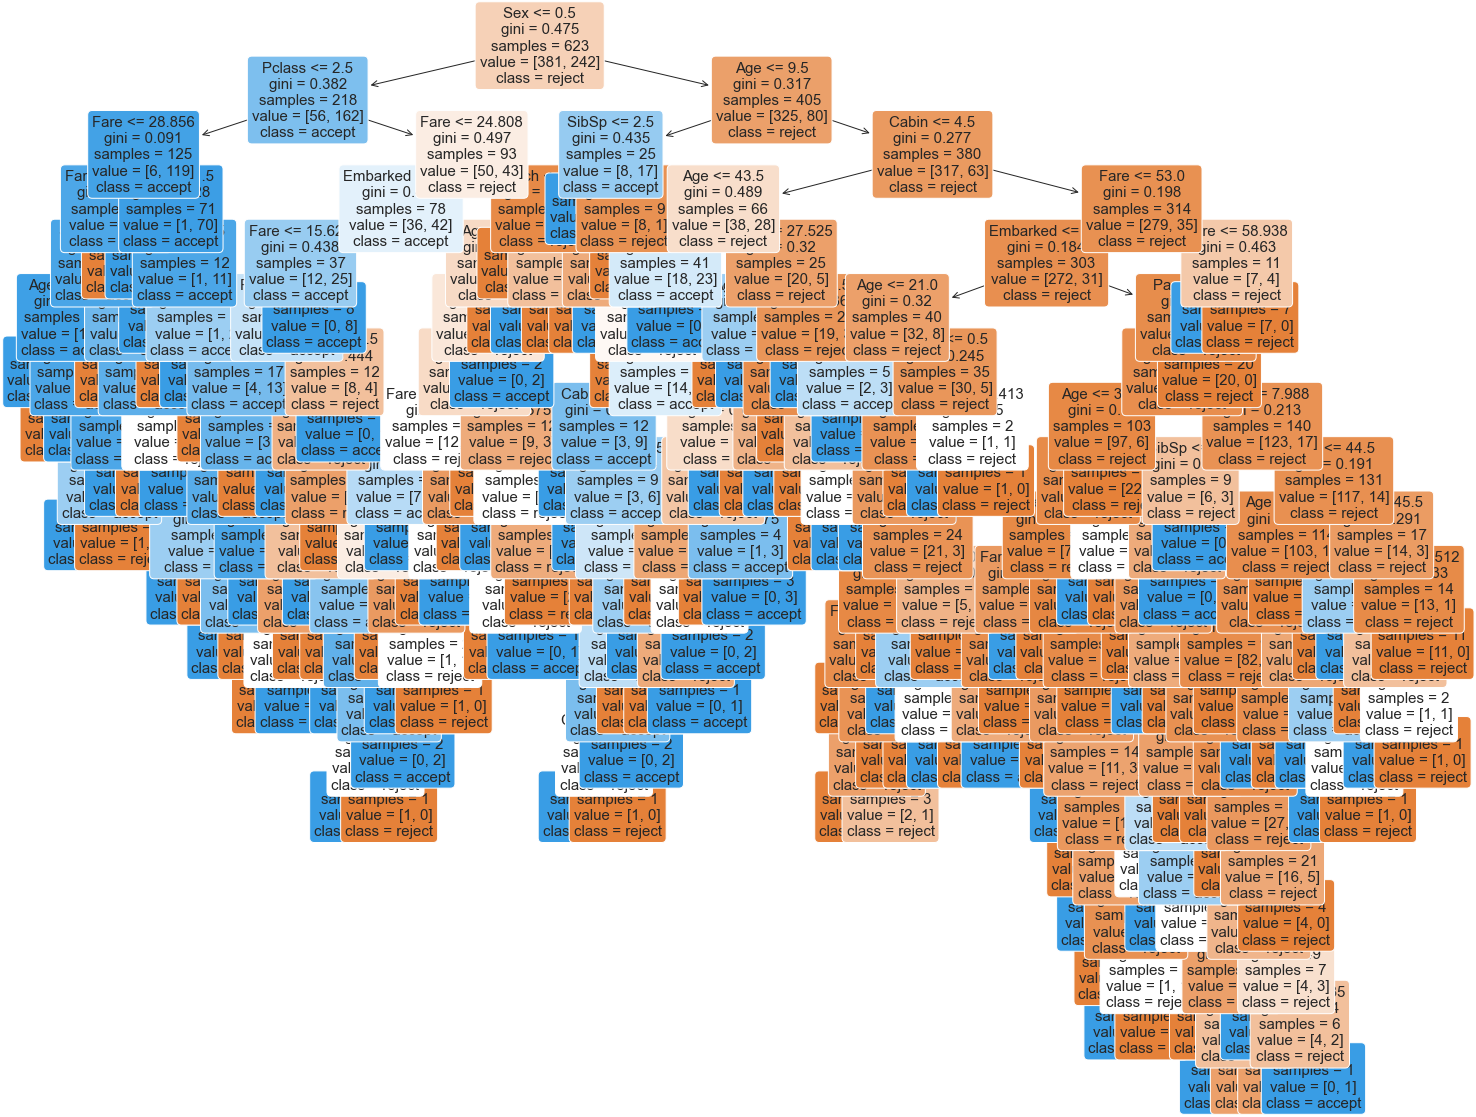

In [25]:
# plot decision tree with plot tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names=['reject','accept'],
                   filled=True,
                   rounded=True,
                   fontsize=15)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *

data = pd.read_csv('./data/loan_train.csv')
data.rename(columns={"ZIP Code":"ZIP_CODE", "Personal Loan":"Personal_Loan"}, inplace=True)

data.ZIP_Code = data['ZIP_CODE']// 1000
data = pd.get_dummies(data, columns=['ZIP_CODE'])

X = data.drop(['ID', 'Personal_Loan'], axis=1)
y = data.Personal_Loan

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

dt = DecisionTreeClassifier(max_depth=3, random_state=2022)
dt.fit(X_train, y_train).score(X_test, y_test)

C:\Users\lucky\AppData\Local\Temp\ipykernel_12772\1856919081.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.ZIP_Code = data['ZIP_CODE']// 1000


0.903

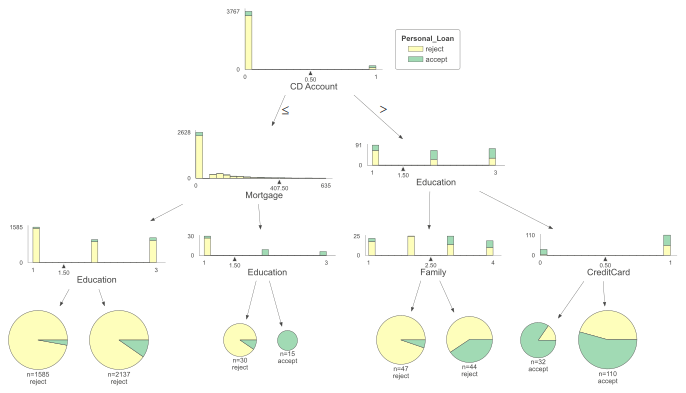

In [27]:
# Visualize decision tree with dtreeviz package
import warnings; warnings.filterwarnings('ignore')
viz = dtreeviz(dt, X, y,
               target_name='Personal_Loan',
               feature_names=X.columns, 
               class_names=['reject','accept']
              )         
viz
#viz.view()
#viz.save("decision_tree.svg")

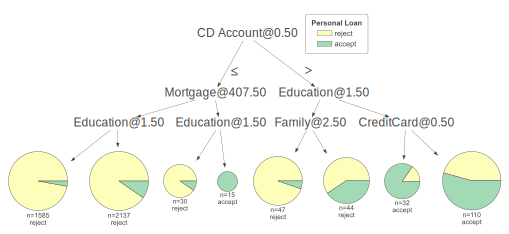

In [28]:
# Decision tree without scatterplot or histograms for decision nodes

viz = dtreeviz(dt, X, y,
               target_name='Personal Loan',
               feature_names=X.columns, 
               class_names=['reject','accept'],
               fancy=False # fance=False to remove histograms/scatterplots from decision nodes
              )         
viz

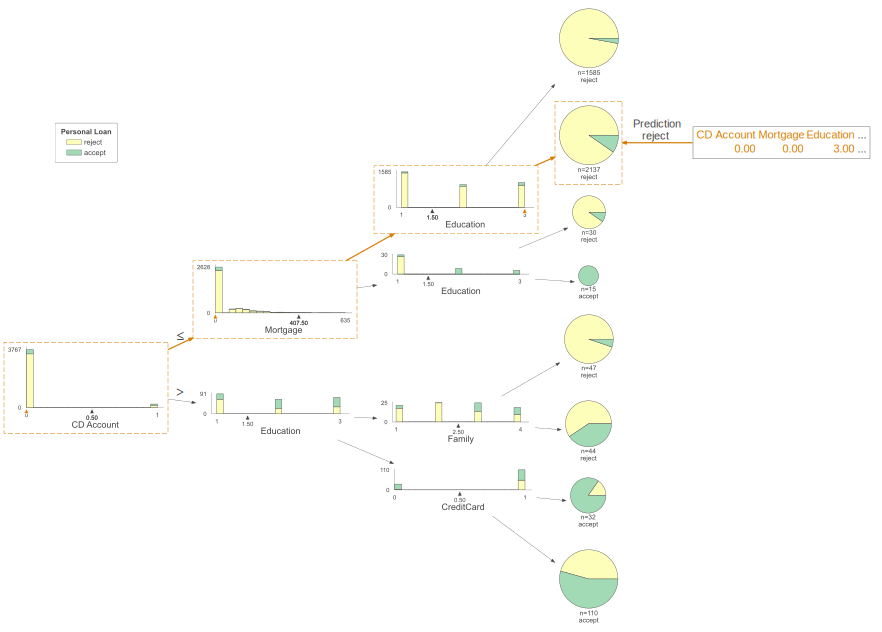

In [29]:
# Prediction path

viz = dtreeviz(dt, X, y,
               target_name='Personal Loan',
               feature_names=X.columns, 
               class_names=['reject','accept'],
               orientation ='LR',  # left-right orientation
               X=X.iloc[np.random.randint(0, len(X))])  # need to give single observation for prediction        
viz

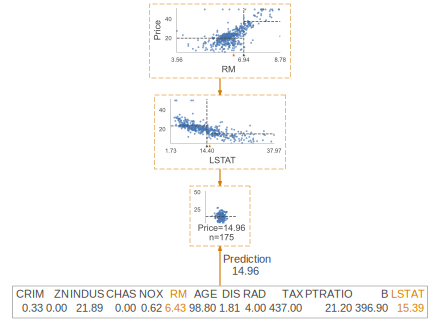

In [30]:
# Regession Tree
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data, 
               boston.target, 
               target_name='Price', 
               orientation ='TD',  # top-down orientation
               feature_names=boston.feature_names,
               X=boston.data[np.random.randint(0, len(boston.data)),:],
               show_just_path=True)              
viz

In [31]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

pred_dt01 = dt.predict(X_test)
pred_dt02 = dt.predict_proba(X_test)
print(accuracy_score(y_test, pred_dt01))
print(roc_auc_score(y_test, pred_dt01))

0.903
0.5945054460952213


#### Linear Regression - boston

In [32]:
boston = pd.read_csv('./data/boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


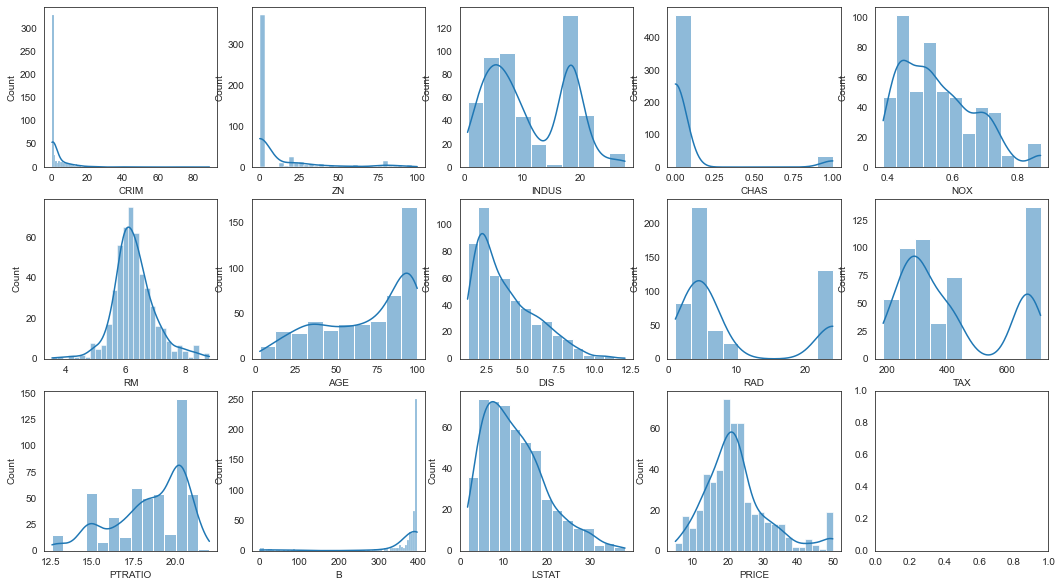

In [33]:
fig, axes = plt.subplots(figsize=(18, 10), ncols=5, nrows=3)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.histplot(x=boston[col], kde=True, ax=ax)
# kde = Kunnel Density, 분포추정선 그려주기

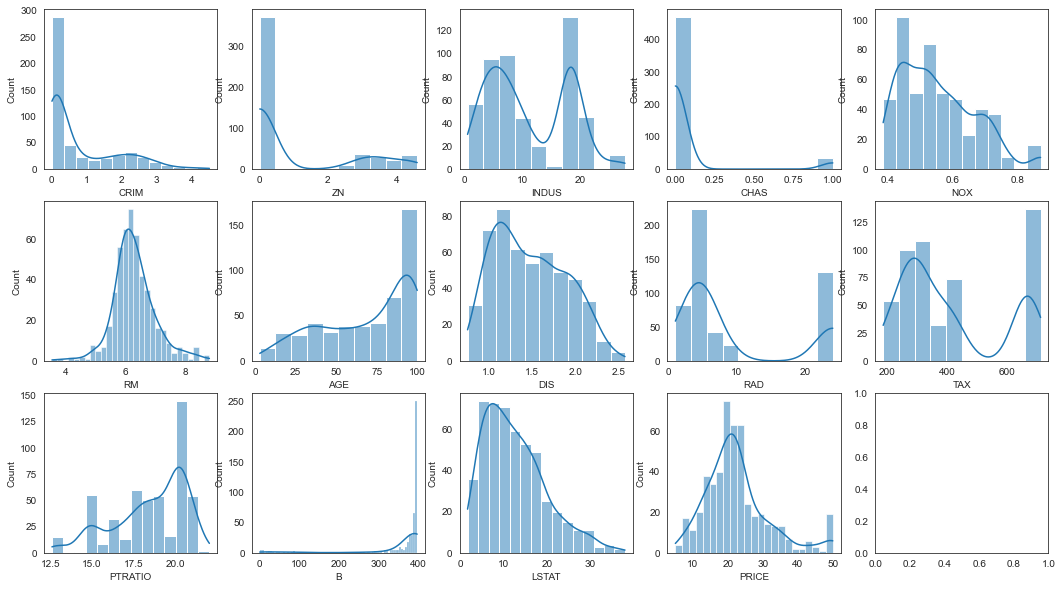

In [34]:
log_col = ['CRIM','ZN','DIS']
boston.loc[:,log_col] = np.log1p(boston[log_col])
#로그 처리하기 위한 변수들을 모아서, 한번에 로그처리
fig, axes = plt.subplots(figsize=(18,10), ncols=5, nrows=3)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.histplot(x=boston[col], kde=True, ax=ax) 

In [35]:
# 각 변수가 추정 결과에 미치는 영향을 살펴보기 위한 산점도
y = boston.PRICE
X = boston.drop(columns='PRICE')

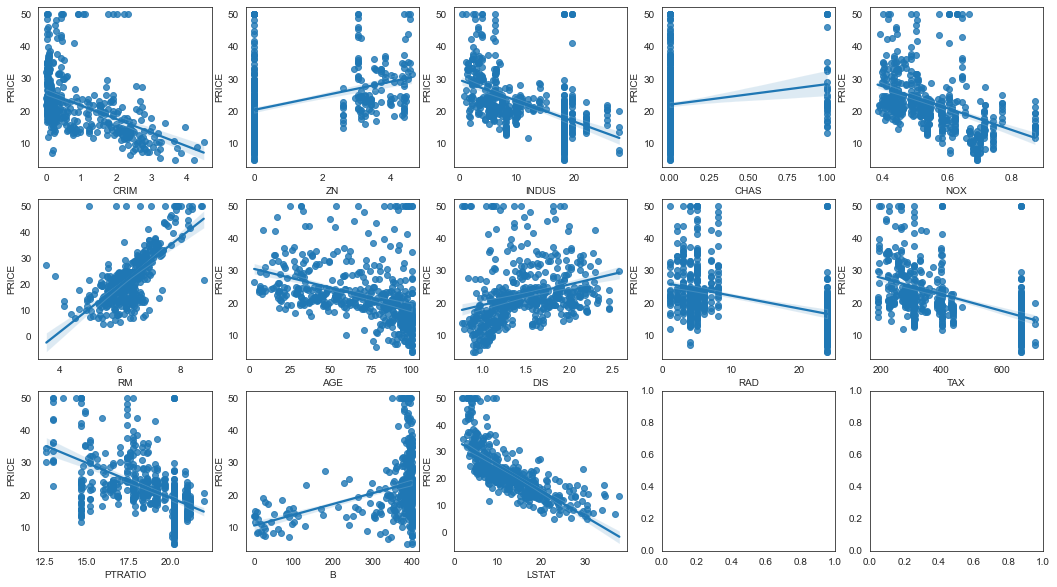

In [36]:
fig, axes = plt.subplots(figsize=(18, 10), ncols=5, nrows=3)

for col, ax in zip(X.columns, axes.reshape(15)):
    sns.regplot(x=X[col], y=y, ax=ax)
# 파란선 뒤의 배경은 신뢰구간으로, 신뢰구간이 넓을수록 선이 정확하지 않을 수 있음

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('MAE :', mean_absolute_error(y_test, pred))
print('R2  :', r2_score(y_test, pred))

MAE : 3.873136485713938
R2  : 0.6884696452794871


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #train set에 fit 한 뒤, 이걸 활용해 train, test set에 적용한다(information leak 방지)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [40]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
pred = lr.predict(X_test_std)
print('MAE :', mean_absolute_error(y_test, pred))
print('R2  :', r2_score(y_test, pred))

MAE : 3.873136485713934
R2  : 0.6884696452794873


In [41]:
lr.intercept_

22.255932203389833

In [42]:
lr.coef_

array([-2.71327861,  0.69717327, -0.64217396,  0.78900951, -1.7877042 ,
        2.27551035, -0.77144149, -3.94931226,  3.80303516, -2.29189734,
       -2.09166826,  0.72550752, -2.76244219])

In [43]:
coeff = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coeff.sort_values(ascending=False)

RAD        3.80
RM         2.28
CHAS       0.79
B          0.73
ZN         0.70
INDUS     -0.64
AGE       -0.77
NOX       -1.79
PTRATIO   -2.09
TAX       -2.29
CRIM      -2.71
LSTAT     -2.76
DIS       -3.95
dtype: float64

In [44]:
#다항 회귀의 사용
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_2 = poly.fit_transform(X_train_std)
X_test_2 = poly.fit_transform(X_test_std)

lr = LinearRegression()
lr.fit(X_train_2, y_train)
pred = lr.predict(X_test_2)
print('MAE :', mean_absolute_error(y_test, pred))
print('R2  :', r2_score(y_test, pred))

MAE : 2.8607833059210526
R2  : 0.8265232912367145


In [45]:
# 너무 높은 항수는 오히려 모델을 제대로 만들지 못함
poly = PolynomialFeatures(degree=5)
X_train_5 = poly.fit_transform(X_train_std)
X_test_5 = poly.fit_transform(X_test_std)

lr = LinearRegression()
lr.fit(X_train_5, y_train)
pred = lr.predict(X_test_5)
print('MAE :', mean_absolute_error(y_test, pred))
print('R2  :', r2_score(y_test, pred))

MAE : 5.412386587071223
R2  : 0.3050280892773263


In [46]:
#릿지 회귀, alpha를 조정하여 규제
from sklearn.linear_model import Ridge
param = [0.001, 0.01, 0.1, 1, 10, 100]

for a in param:
    lr_r = Ridge(alpha=a)
    lr_r.fit(X_train_std, y_train)
    pred = lr_r.predict(X_test_std)
    print('MAE@',a,':', mean_absolute_error(y_test, pred))

MAE@ 0.001 : 3.873120573313245
MAE@ 0.01 : 3.872977436762224
MAE@ 0.1 : 3.8716285188068342
MAE@ 1 : 3.8600785925908623
MAE@ 10 : 3.834446126060958
MAE@ 100 : 4.189086346055229


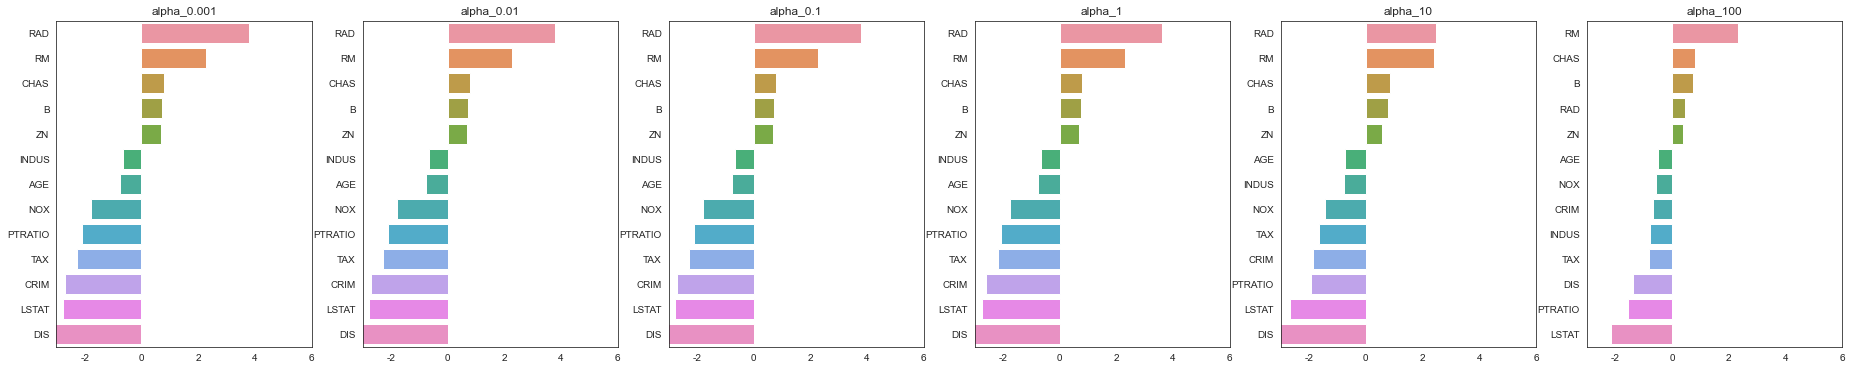

In [47]:
#규제에 따른 계수 변화 시각화
fig, axes = plt.subplots(figsize=(32,6), ncols=6)

for a, ax in zip(param, axes):
    lr_r = Ridge(alpha=a)
    lr_r.fit(X_train_std, y_train)
    
    coeff = pd.Series(data=lr_r.coef_, index=X.columns)
    coeff = coeff.sort_values(ascending=False)

    ax.set_title('alpha_'+str(a))
    ax.set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax)

In [48]:
#라쏘 회귀
from sklearn.linear_model import Lasso
param = [0.001, 0.01, 0.1, 1, 10, 100]

for a in param:
    lr_l = Lasso(alpha=a)
    lr_l.fit(X_train_std, y_train)
    pred = lr_l.predict(X_test_std)
    print('MAE@',a,':', mean_absolute_error(y_test, pred))
#alpha 가 1 이상부터 언더피팅 발생(규제에 의한)

MAE@ 0.001 : 3.871316683152215
MAE@ 0.01 : 3.8564808735774796
MAE@ 0.1 : 3.8159270063909276
MAE@ 1 : 4.2167441175179565
MAE@ 10 : 7.390098126672615
MAE@ 100 : 7.390098126672615


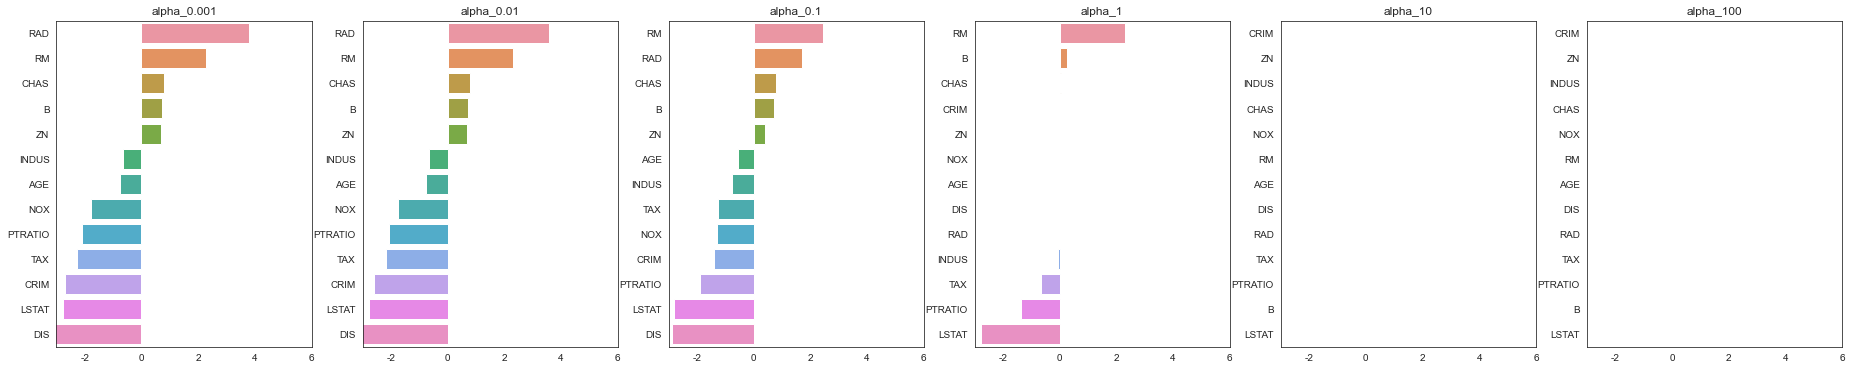

In [49]:
fig, axes = plt.subplots(figsize=(32,6), ncols=6)

for a, ax in zip(param, axes):
    lr_l = Lasso(alpha=a)
    lr_l.fit(X_train_std, y_train)
    
    coeff = pd.Series(data=lr_l.coef_, index=X.columns)
    coeff = coeff.sort_values(ascending=False)

    ax.set_title('alpha_'+str(a))
    ax.set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax)
#중요하지 않은 변수부터 0 변환됨

## Elastic Net
- a L1 + b L2 -> L1_ratio = a / (a+b)
- L1_ratio=0 -> L2 규제
- L1_ratio=1 -> L1 규제